/home/cddelong/miniconda3/envs/dsp/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/cddelong/miniconda3/envs/dsp/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


0.6955643534361893



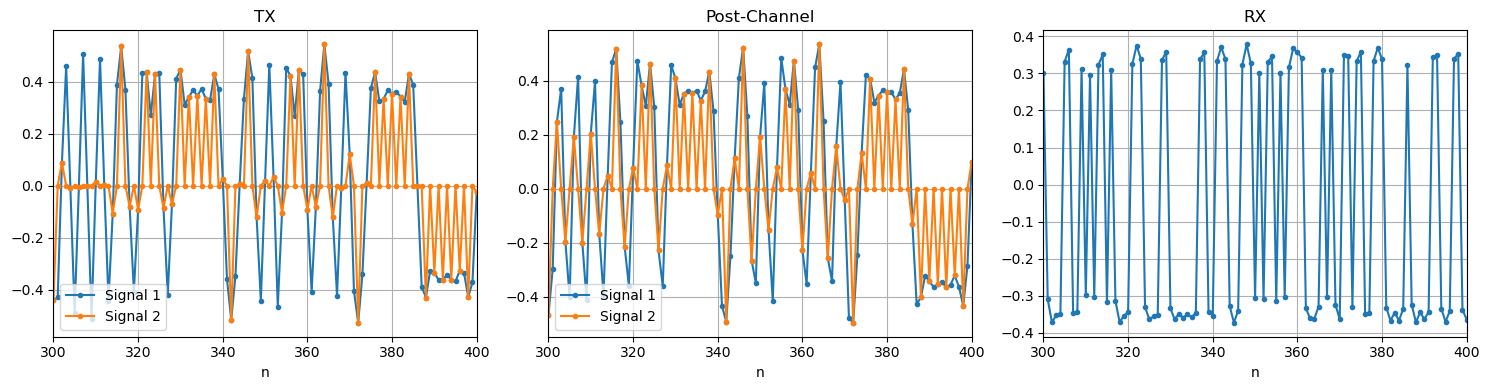

/home/cddelong/sdr/sdr-notebooks/notebooks/../py_utils/visualization.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


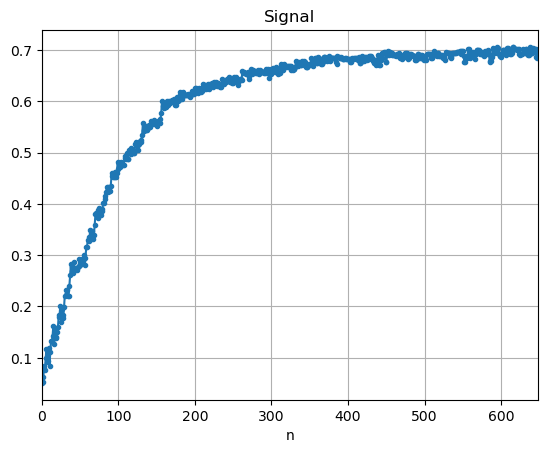

In [1]:

# Reload imports every time this cell is run
%reload_ext autoreload
%autoreload 2

# Imports
import scipy
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

import sys
sys.path.insert(0, '..')
# import importlib
# import utils
# importlib.reload(utils)
from py_utils import *

# Constants
SPS = int(2)
N_BITS = 10**6
N_SYMBOLS = int(N_BITS/2) + 1       # qpsk: 2 bits/sample, differential coding: +1 symbol
N_RRC_TAPS = SPS*10 + 1
SNR_DB = 20




fig, axs = plt.subplots(1, 3, figsize=(15, 4))


SPS = 2
N_RRC_TAPS = SPS*10 + 1
N_SAMPS = 1300

# TX
h_rrc = rrc(Ts=SPS, n_taps=N_RRC_TAPS)
s = np.convolve(upsample(modulate_qpsk(np.random.randint(2, size=N_SAMPS)), SPS), h_rrc)[11:-10]
samples = np.array([s[i]*(i % SPS == 0) for i in np.arange(s.size)], dtype=s.dtype)
plot_signal(s, samples, title="TX", ax=axs[0], xlim=[300, 400])


# Channel
mu = 0.3
s = apply_sto(s, mu)

samples = np.array([s[i]*(i % SPS == 0) for i in np.arange(s.size)], dtype=s.dtype)

plot_signal(s, samples, title="Post-Channel", ax=axs[1], xlim=[300, 400])


# RX
s = np.convolve(s, h_rrc)[10:-10]
stc = GardnerSymbolTimingCorrector()
s = stc.correct_batch(batch=s[0:])
samples = np.array([s[i]*(i % SPS == 0) for i in np.arange(s.size)], dtype=s.dtype)
# plot_signal(s, samples, title="RX", ax=axs[2], xlim=[300, 400])
plot_signal(s, title="RX", ax=axs[2], xlim=[300, 400])
print(stc.mu)
print()

plt.tight_layout()
plt.show()

plot_signal(stc.mu_log, n_samps=len(stc.mu_log))
